In [1]:
import tqdm
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.spatial.distance import pdist, cdist, squareform

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from zeo_amd.plotting import savefig

plt.style.use("jupyter")

In [2]:
iza = pd.read_csv("../data/iza_nnpscan_dm.csv", index_col=0)
zfeat = pd.read_csv("../data/iza_nnpscan_features.csv", index_col=0)
hyp = pd.read_csv("../data/hyp_dm.csv", index_col=0)
hfeat = pd.read_csv("../data/hyp_features.csv", index_col=0)

In [3]:
REMOVE_ZEOLITES = ["RWY"]

In [4]:
zdensity = (zfeat
    .loc[~zfeat.iza_code.isin(REMOVE_ZEOLITES)]
    ["density"]
    .values
    .reshape(-1, 1)
)
hdensity = hfeat["density"].values.reshape(-1, 1)

In [5]:
ddist = cdist(hdensity, zdensity)

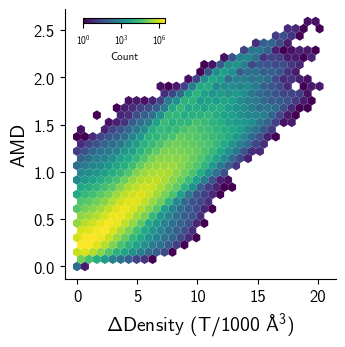

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 3.5))

y = hyp.drop(REMOVE_ZEOLITES, axis=1).values.reshape(-1)
x = ddist.reshape(-1)

hb = ax.hexbin(
    x, 
    y,
    gridsize=31,
    linewidths=(0.,),
    mincnt=1,
    cmap="viridis",
    bins="log"
)

cax = inset_axes(ax, width="30%", height="2%", bbox_to_anchor=(-0.6, 0, 1, 1), bbox_transform=ax.transAxes)
cbar = fig.colorbar(hb, cax=cax, orientation="horizontal")
cbar.set_ticks([1, 1e3, 1e6])
cbar.set_ticklabels(["10$^0$", "10$^3$", "10$^6$"], fontsize=7)
cbar.set_label("Count", fontsize=8)

ax.set_ylabel("AMD")
ax.set_xlabel("ΔDensity (T/1000 Å$^3$)")

savefig(fig, "06-hypothetical-density.pdf")    
plt.show()